<a href="https://colab.research.google.com/github/Athulkrishna-S/L-and-T/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas scikit-learn

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


data = pd.read_csv('telecom_customer_churn.csv')

print("Dataset Info:")
print(data.info())
print("\nDataset Head:")
print(data.head())


if 'TotalCharges' in data.columns:
    data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
else:
    print("'TotalCharges' column not found!")

data = data.dropna()


data = pd.get_dummies(data, drop_first=True)


target_column = [col for col in data.columns if 'Churn' in col or 'churn' in col]
if not target_column:
    raise ValueError("Target column (e.g., 'Churn') not found in the dataset!")
target_column = target_column[0]

X = data.drop([target_column], axis=1)
y = data[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Features:")
print(importances.head(10))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 no

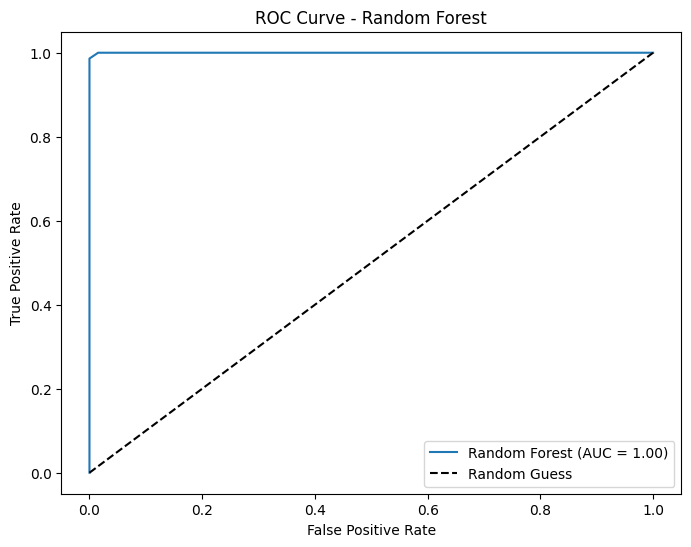

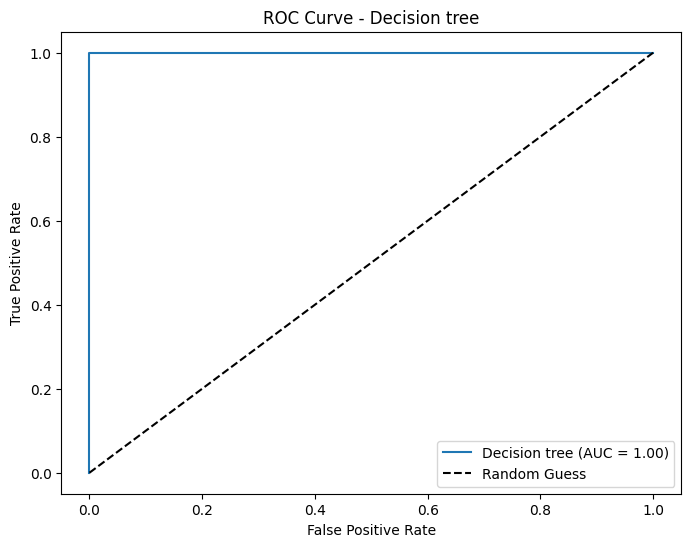

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.66      0.75      0.71        65
        True       0.75      0.65      0.70        72

    accuracy                           0.70       137
   macro avg       0.70      0.70      0.70       137
weighted avg       0.71      0.70      0.70       137



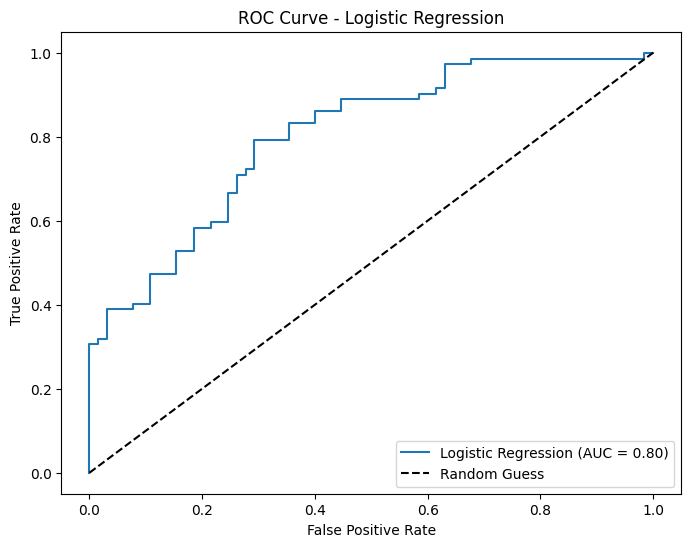

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Calculate feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)

#  ROC Curve
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

# Get probabilities for ROC curve
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_proba_rf, "Random Forest")

y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_proba_dt, "Decision tree")


#  Logistic Regression Model for Comparison
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Classification Report for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Logistic Regression ROC Curve
y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_proba_logreg, "Logistic Regression")


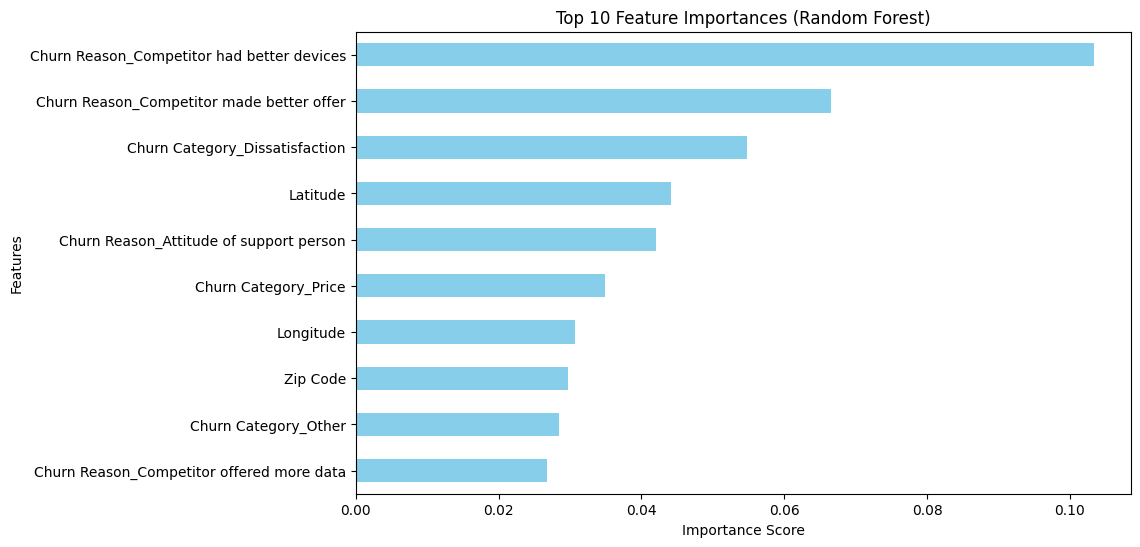

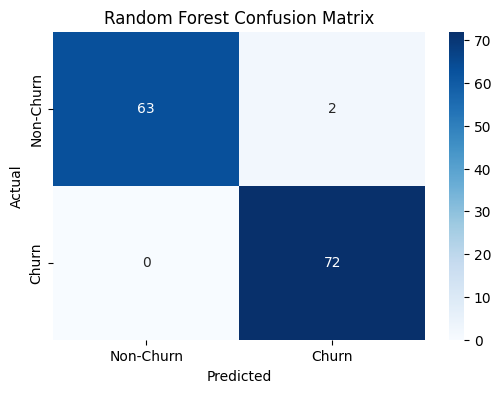

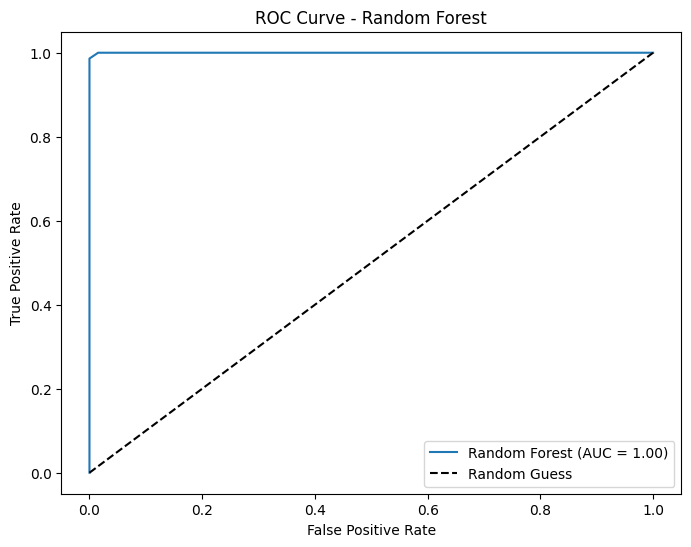

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


# Load and preprocess data
data = pd.read_csv('telecom_customer_churn.csv')
data = data.dropna()
data = pd.get_dummies(data, drop_first=True)

# Identify target column
target_column = [col for col in data.columns if 'Churn' in col or 'churn' in col][0]
X = data.drop([target_column], axis=1)
y = data[target_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature Importances
importances = pd.Series(rf.feature_importances_, index=X.columns)

# Visualizations
plt.figure(figsize=(10, 6))
importances.sort_values(ascending=True).tail(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'],
                yticklabels=['Non-Churn', 'Churn'])
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test, rf.predict(X_test), "Random Forest Confusion Matrix")

# ROC Curve
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_pred_proba_rf, "Random Forest")


Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        65
        True       1.00      1.00      1.00        72

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137


Random Forest Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.97      0.98        65
        True       0.97      1.00      0.99        72

    accuracy                           0.99       137
   macro avg       0.99      0.98      0.99       137
weighted avg       0.99      0.99      0.99       137

Decision Tree Accuracy: 1.00
Random Forest Accuracy: 0.99


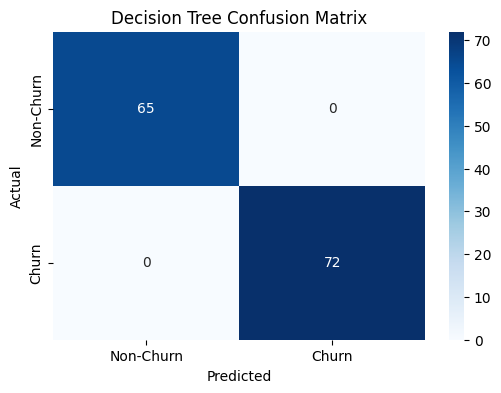

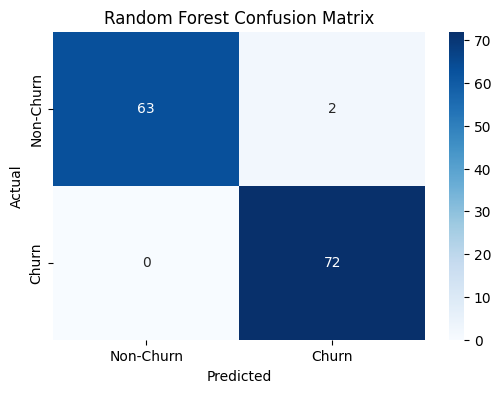

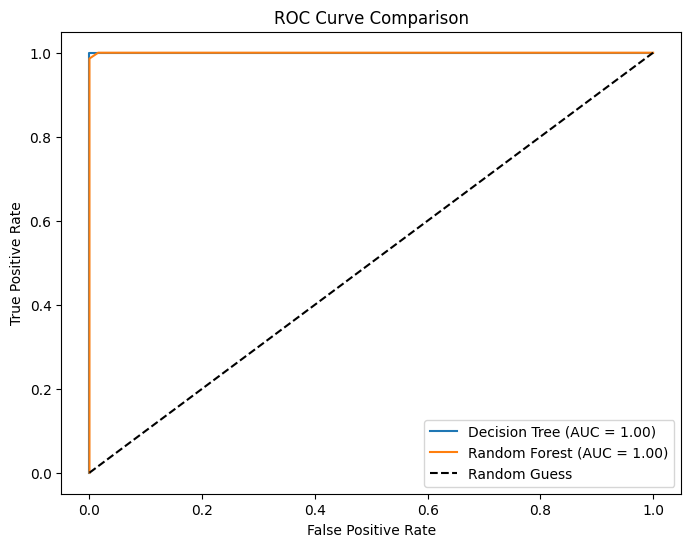


Comparison Summary:
           Model  Accuracy       AUC
0  Decision Tree  1.000000  1.000000
1  Random Forest  0.985401  0.999893


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# Load dataset
data = pd.read_csv('telecom_customer_churn.csv')
data = data.dropna()
data = pd.get_dummies(data, drop_first=True)

# Identify target column
target_column = [col for col in data.columns if 'Churn' in col or 'churn' in col][0]
X = data.drop([target_column], axis=1)
y = data[target_column]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Comparison Metrics
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Accuracy Comparison
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Confusion Matrix Comparison
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churn', 'Churn'],
                yticklabels=['Non-Churn', 'Churn'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plot_confusion_matrix(cm_dt, "Decision Tree")
plot_confusion_matrix(cm_rf, "Random Forest")

# ROC Curve Comparison
def plot_roc_curve_comparison(y_test, y_pred_proba_dt, y_pred_proba_rf):
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

    roc_auc_dt = auc(fpr_dt, tpr_dt)
    roc_auc_rf = auc(fpr_rf, tpr_rf)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")
    plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.title("ROC Curve Comparison")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve_comparison(y_test, y_pred_proba_dt, y_pred_proba_rf)

# Summary Comparison Table
comparison = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "Accuracy": [accuracy_dt, accuracy_rf],
    "AUC": [auc(roc_curve(y_test, y_pred_proba_dt)[0], roc_curve(y_test, y_pred_proba_dt)[1]),
            auc(roc_curve(y_test, y_pred_proba_rf)[0], roc_curve(y_test, y_pred_proba_rf)[1])]
})
print("\nComparison Summary:")
print(comparison)
